In [2]:
import data
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

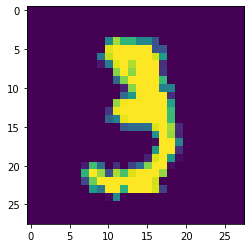

In [6]:
with np.load("./../../../data/corruptmnist/train_0.npz") as f:
    images = f["images"]
    labels = f["labels"]
    plt.imshow(images[10], interpolation='nearest')
    plt.show()

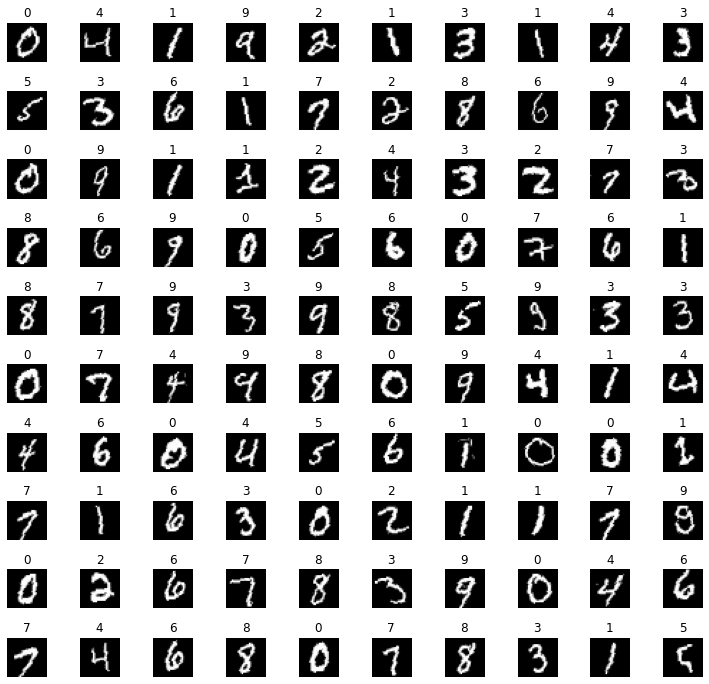

In [40]:
import torch
with np.load("./../../../data/corruptmnist/train_0.npz") as f:
    im = torch.from_numpy(f["images"])
    labels = torch.from_numpy(f["labels"])
    rows = 10
    columns = 10
    fig = plt.figure(figsize=(rows, columns))
    for i in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, i)
        fig.tight_layout()
        plt.imshow(im[i], cmap="gray")
        plt.axis("off")
        plt.title(labels[i].item())
    plt.show()


In [21]:
from torch.utils.data import Dataset

class CorruptMNISTset(Dataset):
    def __init__(self, type="train"):
        base_path = "./../../../data/corruptmnist"
        if type == "train":
            with np.load("./../../../data/corruptmnist/train_0.npz") as f:
                im = torch.from_numpy(f["images"])
                self.images = im.view(im.size(0), -1)                
                labels = torch.from_numpy(f["labels"])
                self.labels = labels.view(labels.size(0), 1)
            for i in range(1, 5):
                with np.load(os.path.join(base_path, f"train_{i}.npz")) as f:
                    im = torch.from_numpy(f["images"])
                    im = im.view(im.size(0), -1)            
                    self.images = torch.cat([self.images, im], dim=0)        
                    labels = torch.from_numpy(f["labels"])
                    labels = labels.view(labels.size(0), 1)
                    self.labels = torch.cat([self.labels, labels], dim=0)
        elif type == "test":
            with np.load("./../../../data/corruptmnist/test.npz") as f:
                im = torch.from_numpy(f["images"])
                self.images = im.view(im.size(0), -1)                
                labels = torch.from_numpy(f["labels"])
                self.labels = labels.view(labels.size(0), 1)
        else:
            assert "wrong option"

        assert len(self.images) == len(self.labels), "image count does not match label count"

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

CorruptMNISTset()

torch.Size([25000, 1])
